In [1]:
# Market Segmentation Analysis

##This project involves performing market segmentation using RFM (Recency, Frequency, Monetary) analysis and K-means clustering. 
##The goal is to identify distinct customer segments to tailor marketing strategies effectively.


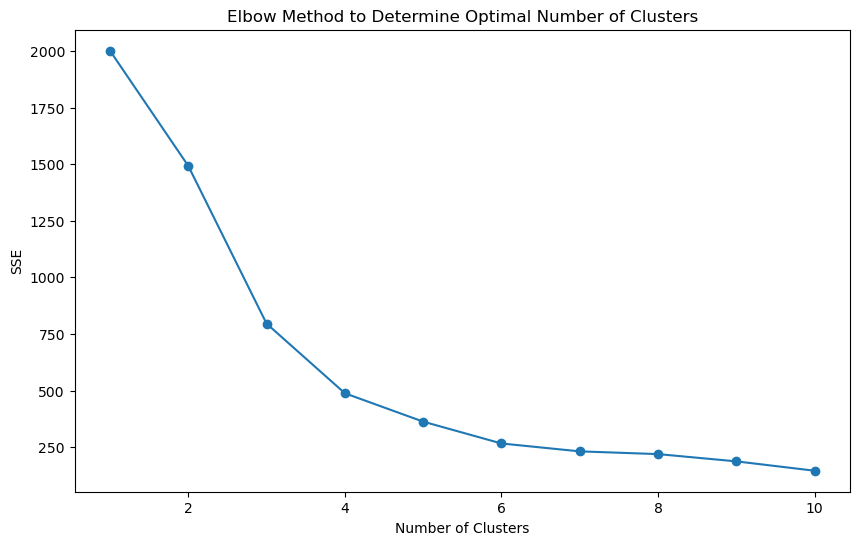

   cluster   recency  frequency      monetary  count
0        0  3.260593   1.480932    491.962712    472
1        1  9.104712   1.167539    375.396911    191
2        2  5.000000  29.000000   4408.745000      2
3        3  1.500000   7.500000  22589.695000      2


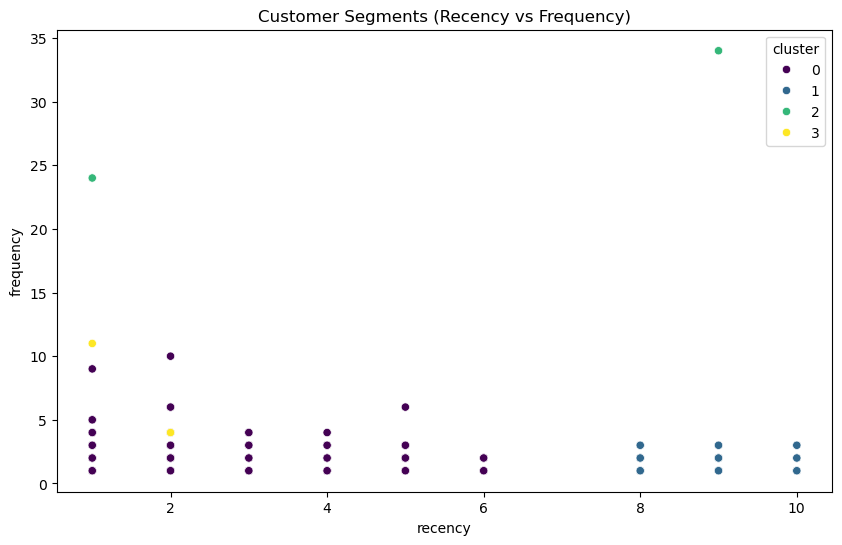

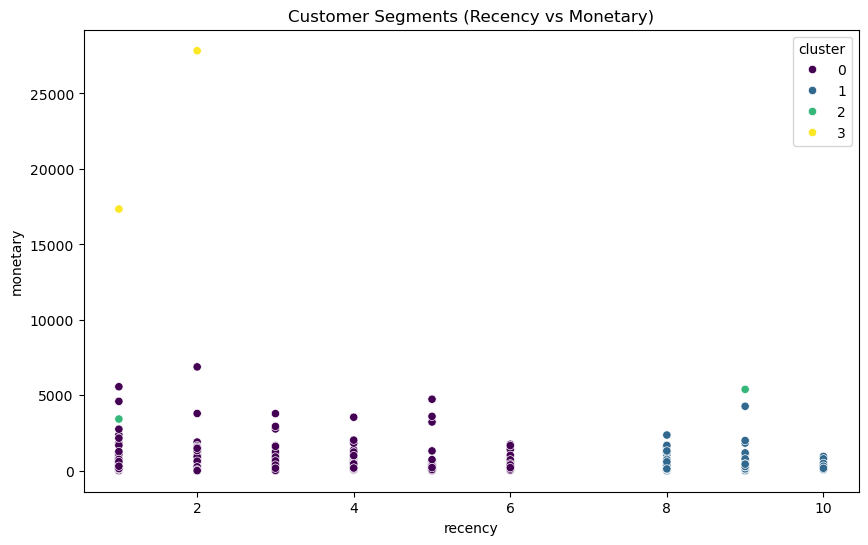

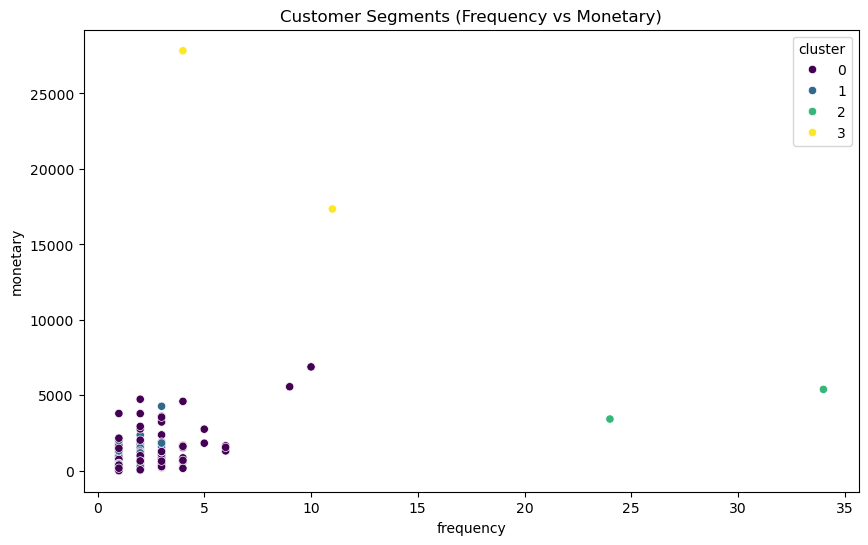

In [3]:
import os
os.environ['OMP_NUM_THREADS'] = '3'

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = 'segment.xlsx'
data = pd.read_excel(file_path)

# Convert the transaction_date to datetime
data['transaction_date'] = pd.to_datetime(data['transaction_date'])

# Calculate Recency, Frequency, and Monetary values
reference_date = data['transaction_date'].max() + pd.Timedelta(days=1)

# Group by customer_id
rfm = data.groupby('customer_id').agg({
    'transaction_date': lambda x: (reference_date - x.max()).days,
    'invoice_no': 'nunique',
    'unit_price': lambda x: (x * data.loc[x.index, 'quantity']).sum()
}).reset_index()

# Rename the columns
rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']

# Standardize the RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['recency', 'frequency', 'monetary']])

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.show()

# Apply K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['cluster'] = kmeans.fit_predict(rfm_scaled)

# Analyze the segments
rfm_grouped = rfm.groupby('cluster').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
    'customer_id': 'count'
}).rename(columns={'customer_id': 'count'}).reset_index()

# Display the segment analysis
print(rfm_grouped)

# Plot the clusters for Recency and Frequency
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='recency', y='frequency', hue='cluster', palette='viridis')
plt.title('Customer Segments (Recency vs Frequency)')
plt.show()

# Plot the clusters for Recency and Monetary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='recency', y='monetary', hue='cluster', palette='viridis')
plt.title('Customer Segments (Recency vs Monetary)')
plt.show()

# Plot the clusters for Frequency and Monetary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='frequency', y='monetary', hue='cluster', palette='viridis')
plt.title('Customer Segments (Frequency vs Monetary)')
plt.show()


In [17]:
#Conclusion

##This analysis successfully segmented the customers into four distinct clusters based on their recency, frequency, and monetary values. These segments can be used to tailor marketing strategies, improve customer engagement, and increase sales.

#Key Insights:
#1. **Cluster A**: Recent, low-frequency, and low-monetary customers.
#2. **Cluster B**: Less recent, low-frequency, and low-monetary customers.
#3. **Cluster C**: Recent, high-frequency, and high-monetary customers.
#4. **Cluster D**: Very recent, medium-frequency, and extremely high-monetary customers.

#Targeted Marketing Campaigns
#- **Cluster A**: Design marketing strategies to encourage more frequent purchases by offering exclusive deals or incentives.
#- **Cluster B**: Implement reactivation campaigns or personalized offers to bring these customers back.
#- **Cluster C**: Offer special discounts or loyalty programs to retain these highly valuable customers.
#- **Cluster D**: Reward these extremely high-value customers with VIP experiences or special recognition to ensure their continued patronage.

#Customer Engagement
#- **Cluster A and Cluster B**: Engage these customers through personalized communication, special promotions, and targeted advertisements.
#- **Cluster C and Cluster D**: Maintain high engagement with these customers through loyalty programs, regular updates on new products or services, and exclusive access to events or offers.

#Customer Feedback
#- Collect feedback from **Cluster C** and **Cluster D** to understand what keeps them satisfied and ensure you continue meeting their needs.
#- Use insights from **Cluster A** and **Cluster B** feedback to improve their experience and address any issues that may be preventing them from becoming more frequent and higher-value customers.

#Monitoring and Evaluation
#- Regularly monitor the performance of each cluster and evaluate the effectiveness of your marketing strategies.
#- Adjust your segmentation and marketing tactics based on customer behavior and feedback.

#By implementing these targeted strategies, the business can effectively engage with different customer segments, improve customer retention, and increase overall sales and profitability.'''
